<a href="https://colab.research.google.com/github/Ridzio/collatz/blob/main/Kollatz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


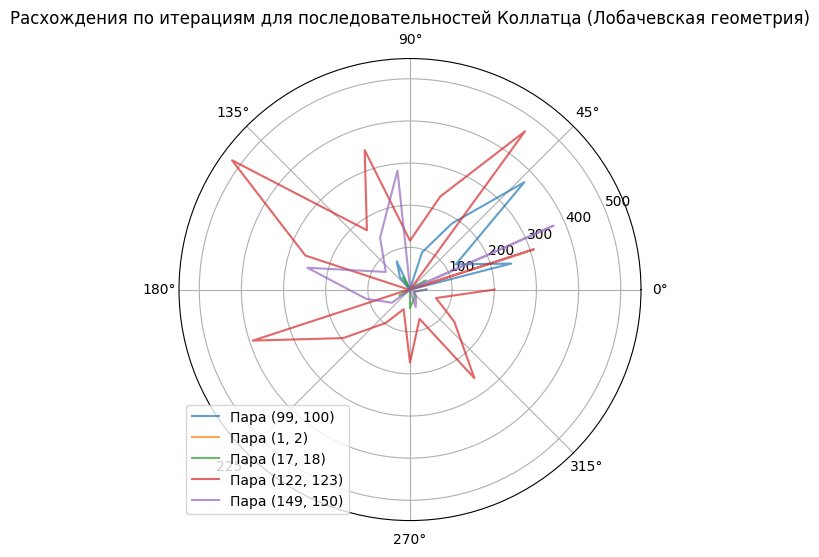

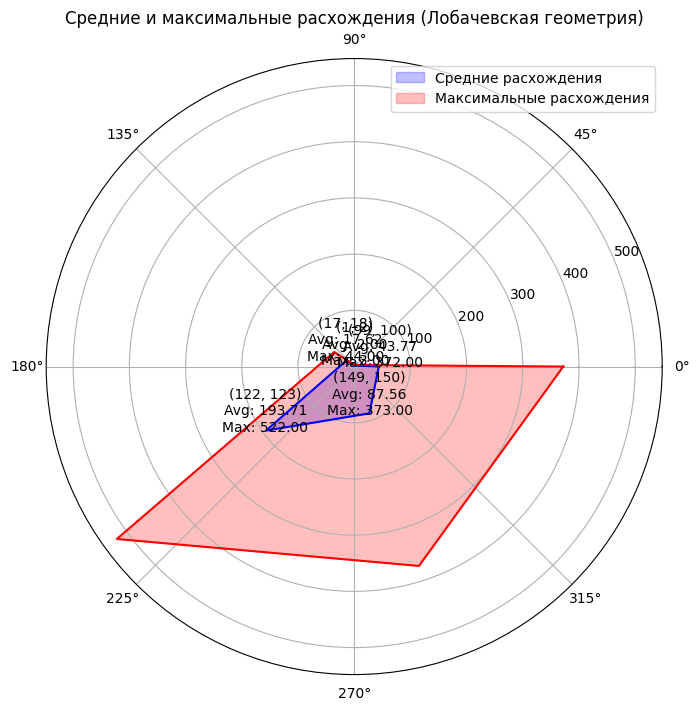

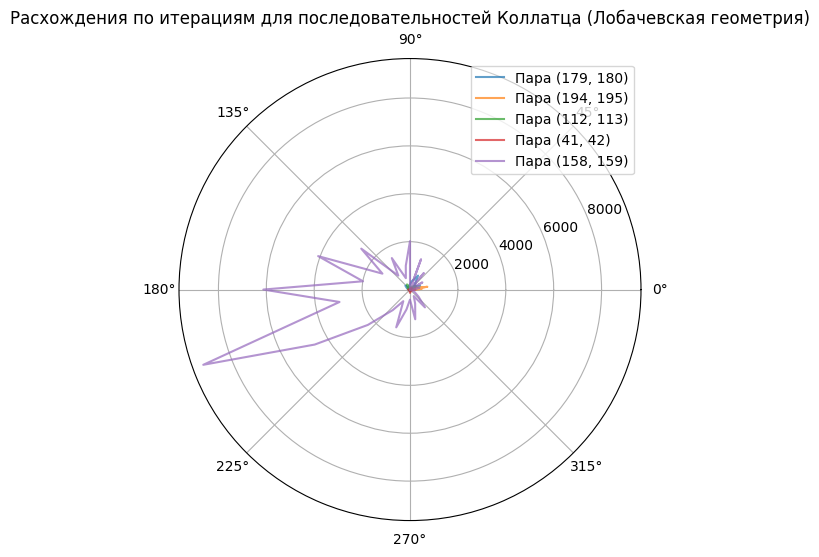

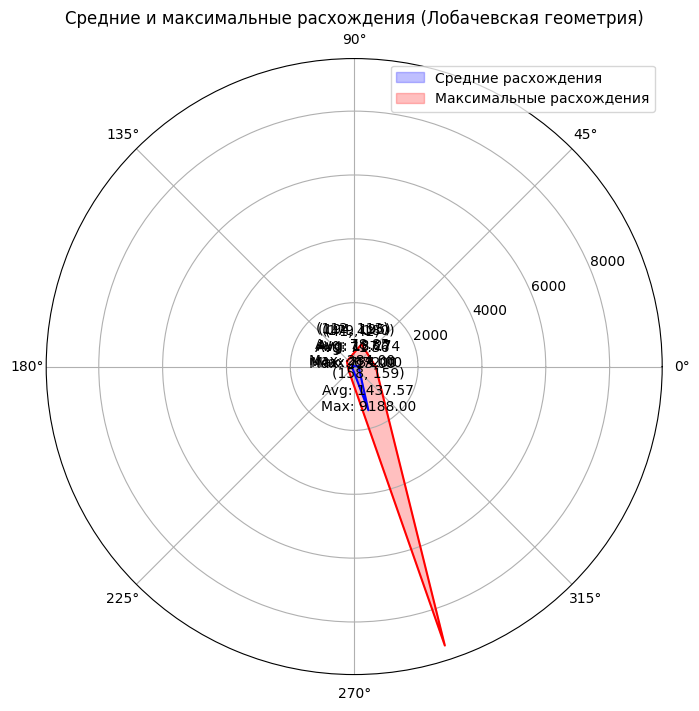

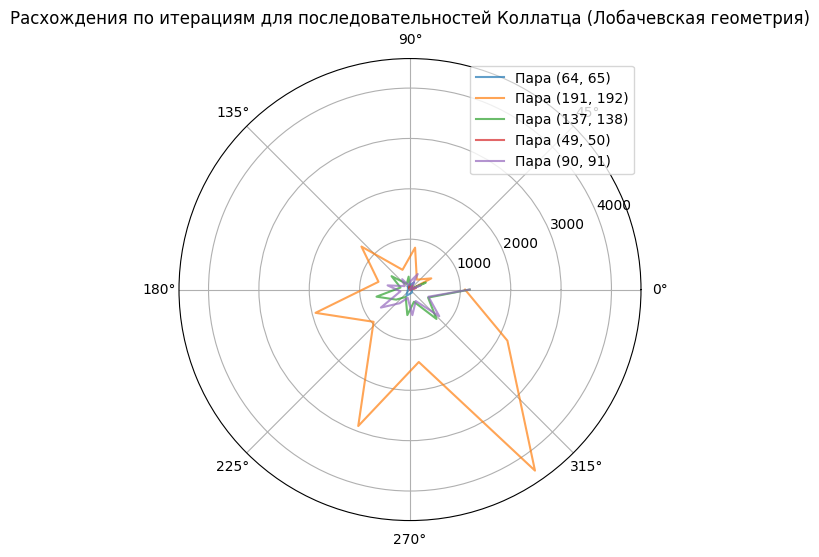

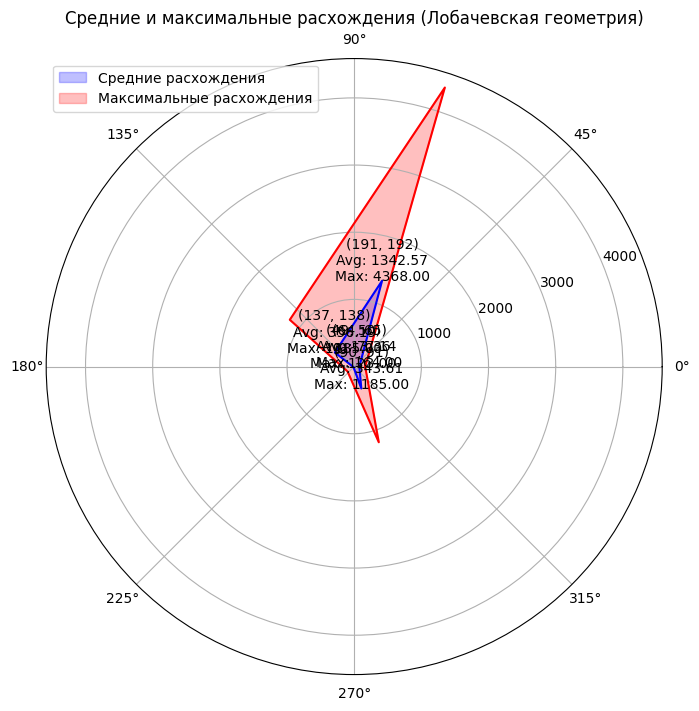

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import json
import os
from ipywidgets import Button, Output, VBox
from google.colab import drive

# Подключение к Google Drive
drive.mount('/content/drive')

# Функция для получения следующего числа по правилу Коллатца
def next_collatz(n):
    return n // 2 if n % 2 == 0 else 3 * n + 1

# Функция для симуляции последовательности Коллатца с остановкой на 1
def collatz_sequence(n, max_iterations=200):
    sequence = [n]
    for _ in range(max_iterations):
        n = next_collatz(n)
        sequence.append(n)
        if n == 1:
            break
    return sequence

# Функция для расчета расхождений
def calculate_differences(seq1, seq2):
    min_len = min(len(seq1), len(seq2))
    differences = [abs(seq1[i] - seq2[i]) for i in range(min_len)]
    return differences, np.mean(differences), np.max(differences)

# Визуализация расхождений по итерациям в Лобачевской геометрии
def visualize_iterations_differences(all_differences, initial_pairs):
    plt.figure(figsize=(10, 6))

    for i, differences in enumerate(all_differences):
        theta = np.linspace(0, 2 * np.pi, len(differences))
        r = differences
        plt.polar(theta, r, label=f'Пара {initial_pairs[i]}', alpha=0.7)

    plt.title('Расхождения по итерациям для последовательностей Коллатца (Лобачевская геометрия)')
    plt.legend()
    plt.show()

# Визуализация среднего и максимального расхождений на круговой диаграмме
def visualize_avg_max_differences(initial_pairs, avg_differences, max_differences):
    num_pairs = len(initial_pairs)

    angles = np.linspace(0, 2 * np.pi, num_pairs, endpoint=False).tolist()
    avg_differences = avg_differences + [avg_differences[0]]  # Закрываем круг
    max_differences = max_differences + [max_differences[0]]  # Закрываем круг
    angles += angles[:1]  # Закрываем круг

    plt.figure(figsize=(8, 8))

    # Круговая диаграмма для средних значений
    ax = plt.subplot(111, polar=True)
    ax.fill(angles, avg_differences, color='blue', alpha=0.25, label='Средние расхождения')
    ax.plot(angles, avg_differences, color='blue')

    # Круговая диаграмма для максимальных значений
    ax.fill(angles, max_differences, color='red', alpha=0.25, label='Максимальные расхождения')
    ax.plot(angles, max_differences, color='red')

    # Аннотации для пар чисел
    for i, (angle, avg, max_val) in enumerate(zip(angles[:-1], avg_differences[:-1], max_differences[:-1])):
        ax.text(angle, avg + 2, f'{initial_pairs[i]}\nAvg: {avg:.2f}\nMax: {max_val:.2f}', horizontalalignment='center')

    ax.set_title('Средние и максимальные расхождения (Лобачевская геометрия)')
    ax.legend()
    plt.show()

# Функция для сохранения статистики в файл
# Обновлённая функция для сохранения статистики в файл
def save_statistics(initial_pairs, avg_differences, max_differences):
    # Преобразование значений в стандартные Python типы
    avg_differences = [float(avg) for avg in avg_differences]
    max_differences = [float(max_val) for max_val in max_differences]

    stats = {
        'pairs': initial_pairs,
        'average_differences': avg_differences,
        'maximum_differences': max_differences
    }

    filename = '/content/drive/My Drive/collatz_statistics.json'  # Путь для сохранения в Google Drive

    # Проверка существования файла
    if os.path.exists(filename):
        with open(filename, 'r') as f:
            try:
                all_stats = json.load(f)
            except json.JSONDecodeError:  # Обработка ошибки чтения
                all_stats = []  # Если файл пуст или поврежден
    else:
        all_stats = []  # Если файл не существует

    all_stats.append(stats)

    # Сохранение данных в файл
    with open(filename, 'w') as f:
        json.dump(all_stats, f, indent=4)

# Остальная часть кода остаётся без изменений


# Генерация случайных последовательных чисел и анализ
def analyze_collatz_for_pairs(num_pairs=5, max_num=200):
    all_differences = []
    avg_differences = []
    max_differences = []
    initial_pairs = []

    # Генерация случайных пар чисел
    for _ in range(num_pairs):
        num1 = random.randint(1, max_num - 1)  # Первое число
        num2 = num1 + 1  # Следующее за ним
        initial_pairs.append((num1, num2))

        # Генерация последовательностей Коллатца для двух чисел
        seq1 = collatz_sequence(num1)
        seq2 = collatz_sequence(num2)

        # Вычисление разниц, среднего и максимального расхождения
        differences, avg_diff, max_diff = calculate_differences(seq1, seq2)

        all_differences.append(differences)
        avg_differences.append(avg_diff)
        max_differences.append(max_diff)

    # Визуализация расхождений по итерациям
    visualize_iterations_differences(all_differences, initial_pairs)

    # Визуализация среднего и максимального расхождений
    visualize_avg_max_differences(initial_pairs, avg_differences, max_differences)

    # Сохранение статистики
    save_statistics(initial_pairs, avg_differences, max_differences)

# Функция для запуска анализа и обновления графиков
def update_analysis(button):
    global num_runs
    analyze_collatz_for_pairs(num_pairs=5, max_num=200)
    num_runs += 1
    if num_runs >= max_runs:
        button.disabled = True
        button.description = "Завершено!"

# Переменные для управления количеством запусков
num_runs = 0
max_runs = 10  # Максимальное количество запусков

# Создание кнопки для запуска анализа
button = Button(description="Далее")
output = Output()

# Обработчик кнопки
button.on_click(update_analysis)

# Отображение интерфейса
display(VBox([button, output]))

# Запуск первоначального анализа
analyze_collatz_for_pairs(num_pairs=5, max_num=200)
